# **TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON**

---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the dataset
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")


In [4]:
data

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [18]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [19]:
# Remove outliers using the IQR method
Q1 = data["Estimated Unemployment Rate"].quantile(0.25)
Q3 = data["Estimated Unemployment Rate"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data["Estimated Unemployment Rate"] >= lower_bound) & (data["Estimated Unemployment Rate"] <= upper_bound)]

In [3]:
data.columns = ["States", "Date", "Frequency", "Estimated Unemployment Rate",
                "Estimated Employed", "Estimated Labour Participation Rate",
                "Region", "Longitude", "Latitude"]


In [5]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'Longitude', 'Latitude'],
      dtype='object')

In [6]:
# Check for missing values
print(data.isnull().sum())


States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64


<ipython-input-12-c9ac5dd4666e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="Reds", annot=True)


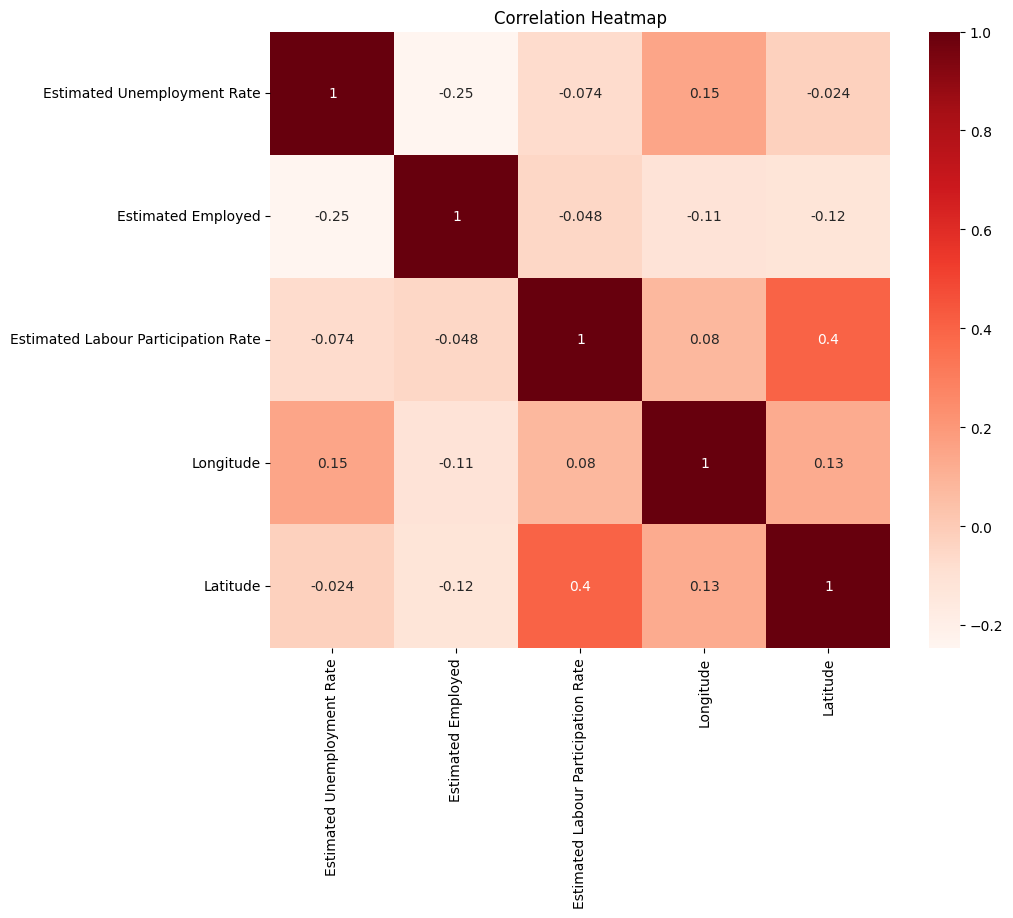

In [12]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.title("Correlation Heatmap")
plt.show()


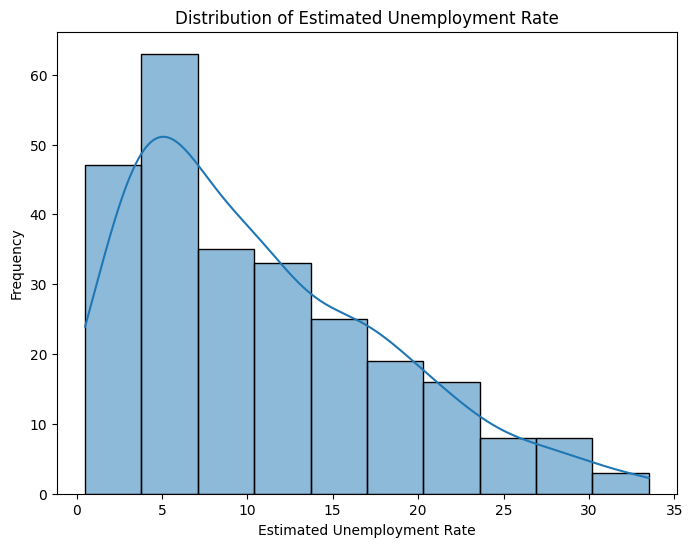

In [21]:
# Distribution of Estimated Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Estimated Unemployment Rate", kde=True)
plt.title("Distribution of Estimated Unemployment Rate")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Frequency")
plt.show()

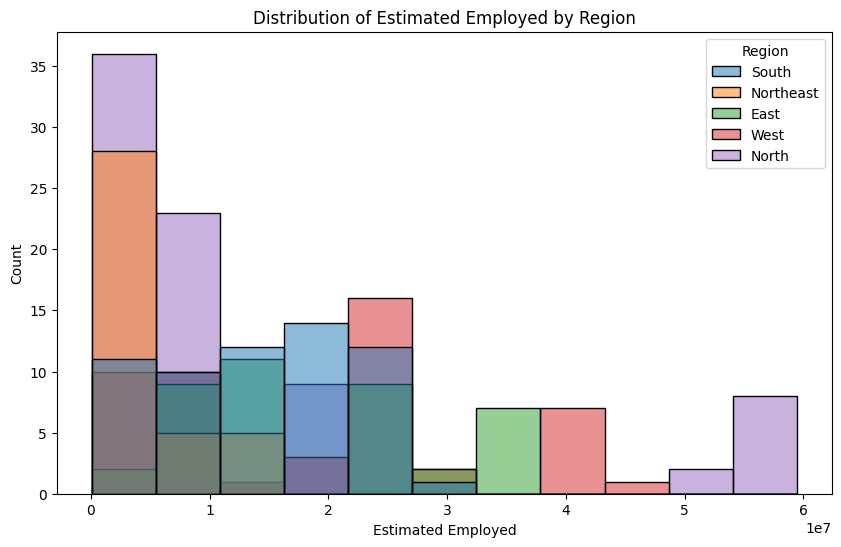

In [13]:
# Plot histogram of Estimated Employed by Region
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Estimated Employed", hue="Region")
plt.title("Distribution of Estimated Employed by Region")
plt.show()


In [14]:
# Create sunburst chart of Unemployment Rate in India
unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]
fig = px.sunburst(unemployment, path=["Region", "States"], values="Estimated Unemployment Rate",
                  color_continuous_scale="RdYlGn", title="Unemployment Rate in India")
fig.update_layout(width=700, height=700)
fig.show()

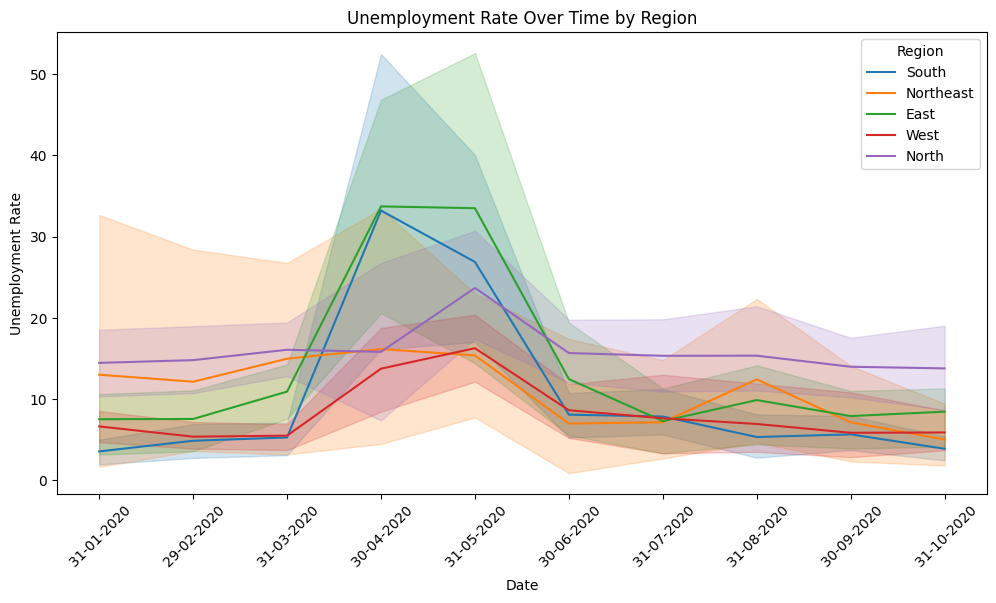

In [15]:
# Line plot of Unemployment Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="Estimated Unemployment Rate", hue="Region")
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.show()


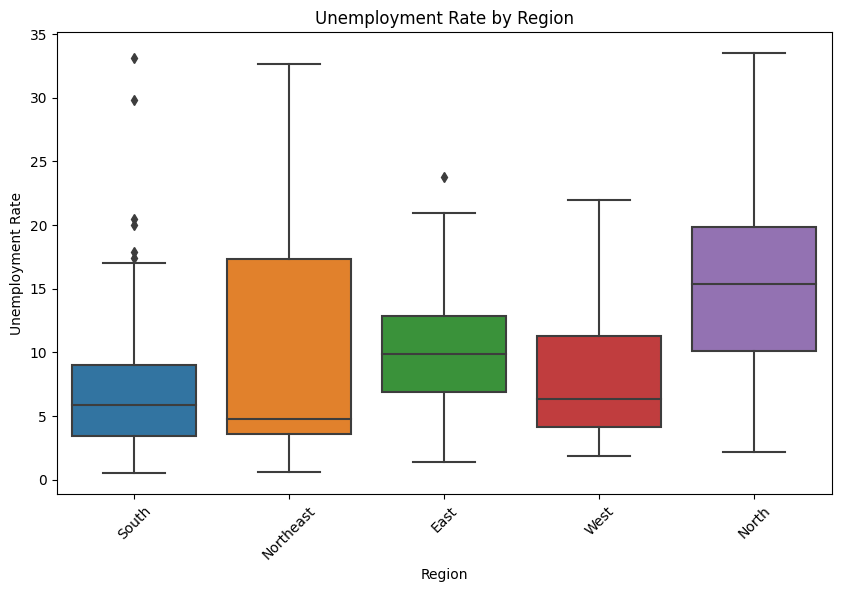

In [20]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Region", y="Estimated Unemployment Rate")
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.show()

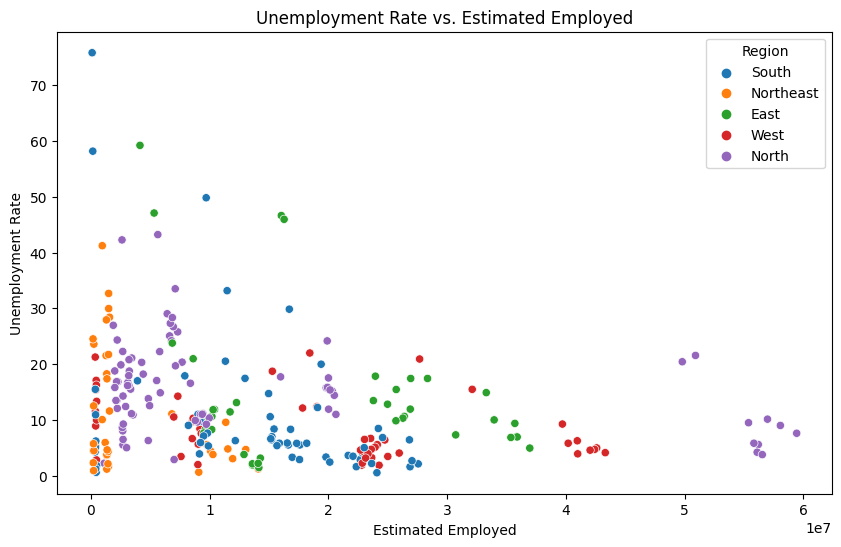

In [17]:
# Scatter plot of Unemployment Rate vs. Estimated Employed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Estimated Employed", y="Estimated Unemployment Rate", hue="Region")
plt.title("Unemployment Rate vs. Estimated Employed")
plt.xlabel("Estimated Employed")
plt.ylabel("Unemployment Rate")
plt.show()

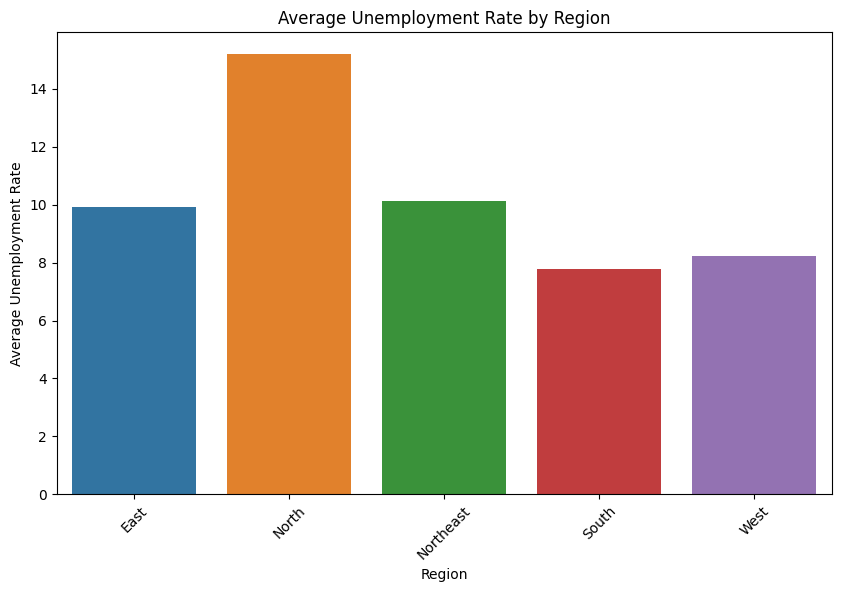

In [22]:
# Bar plot of the average Unemployment Rate by Region
avg_unemployment = data.groupby("Region")["Estimated Unemployment Rate"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_unemployment, x="Region", y="Estimated Unemployment Rate")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate")
plt.xticks(rotation=45)
plt.show()

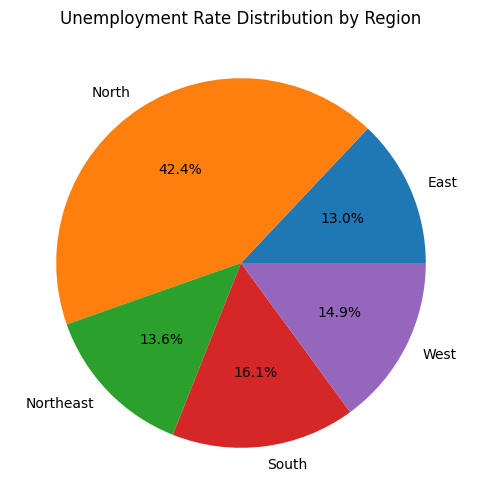

In [24]:
# Pie chart of Unemployment Rate distribution by Region
region_unemployment = data.groupby("Region")["Estimated Unemployment Rate"].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(region_unemployment["Estimated Unemployment Rate"], labels=region_unemployment["Region"], autopct='%1.1f%%')
plt.title("Unemployment Rate Distribution by Region")
plt.show()